   Rank                    Title                       Genre  \
0     1  Guardians of the Galaxy     Action,Adventure,Sci-Fi   
1     2               Prometheus    Adventure,Mystery,Sci-Fi   
2     3                    Split             Horror,Thriller   
3     4                     Sing     Animation,Comedy,Family   
4     5            Suicide Squad    Action,Adventure,Fantasy   
5     6           The Great Wall    Action,Adventure,Fantasy   
6     7               La La Land          Comedy,Drama,Music   
7     8                 Mindhorn                      Comedy   
8     9       The Lost City of Z  Action,Adventure,Biography   
9    10               Passengers     Adventure,Drama,Romance   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Ni

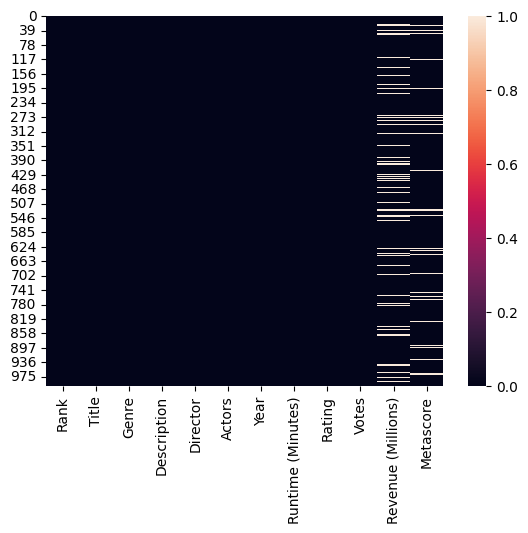

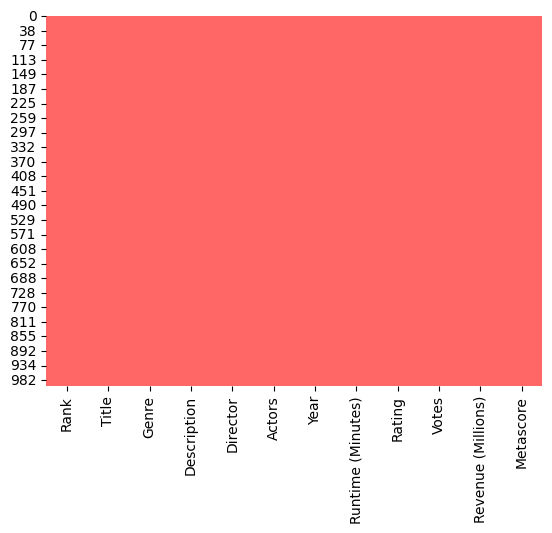

Are there any duplicated values in data? False
              Rank        Year  Runtime (Minutes)      Rating         Votes  \
count   838.000000   838.00000         838.000000  838.000000  8.380000e+02   
mean    485.247017  2012.50716         114.638425    6.814320  1.932303e+05   
std     286.572065     3.17236          18.470922    0.877754  1.930990e+05   
min       1.000000  2006.00000          66.000000    1.900000  1.780000e+02   
25%     238.250000  2010.00000         101.000000    6.300000  6.127650e+04   
50%     475.500000  2013.00000         112.000000    6.900000  1.368795e+05   
75%     729.750000  2015.00000         124.000000    7.500000  2.710830e+05   
max    1000.000000  2016.00000         187.000000    9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          838.000000  838.000000  
mean            84.564558   59.575179  
std            104.520227   16.952416  
min              0.000000   11.000000  
25%             13.967500   47.000000  
5

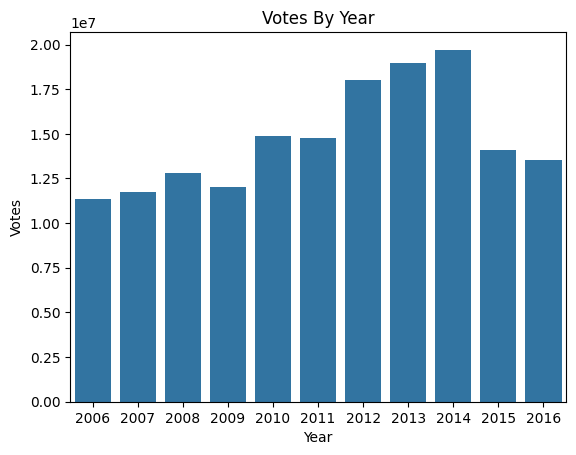

    Year  Revenue (Millions)
0   2016            11002.09
1   2015             8799.09
2   2014             7945.33
3   2013             7399.11
4   2012             6826.39
5   2010             5989.65
6   2011             5341.09
7   2009             5208.39
8   2008             4681.22
9   2007             4095.26
10  2006             3577.48


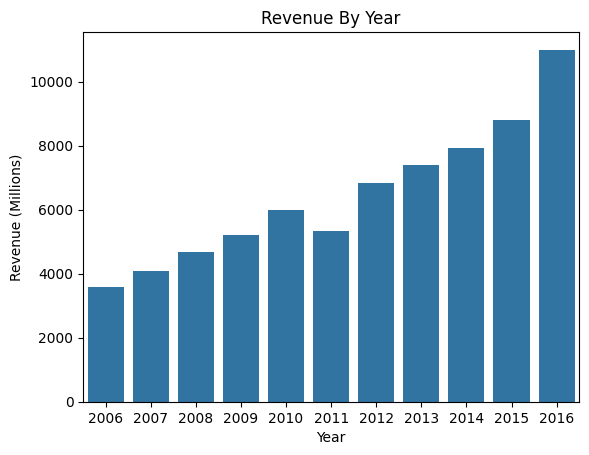

                             Director  Rating
0                   Christopher Nolan    8.68
1                      Makoto Shinkai    8.60
2                     Olivier Nakache    8.60
3                          Aamir Khan    8.50
4    Florian Henckel von Donnersmarck    8.50
..                                ...     ...
519                Sam Taylor-Johnson    4.10
520                       Joey Curtis    4.00
521                      George Nolfi    3.90
522                        James Wong    2.70
523                   Jason Friedberg    1.90

[524 rows x 2 columns]
                                          Runtime (Minutes)
Title                                                      
The Hateful Eight                                       187
The Wolf of Wall Street                                 180
La vie d'Adèle                                          180
Cloud Atlas                                             172
3 Idiots                                                170
Inte

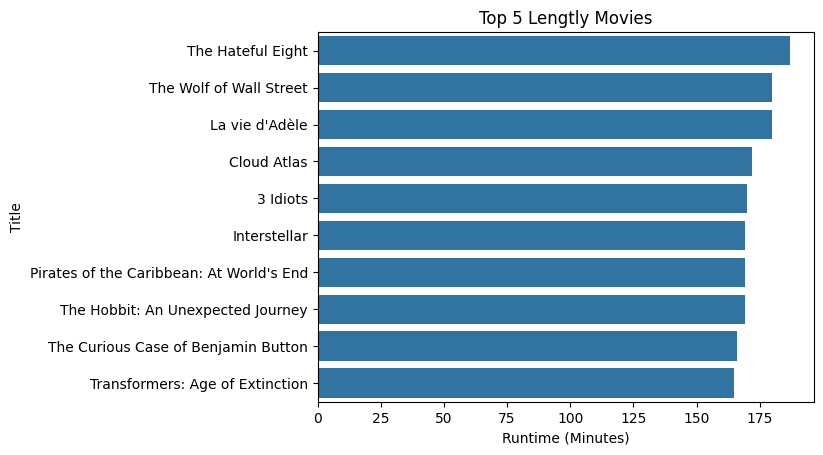

                       Rating                          Director
Title                                                          
The Dark Knight           9.0                 Christopher Nolan
Inception                 8.8                 Christopher Nolan
Interstellar              8.6                 Christopher Nolan
Kimi no na wa             8.6                    Makoto Shinkai
The Intouchables          8.6                   Olivier Nakache
The Prestige              8.5                 Christopher Nolan
The Departed              8.5                   Martin Scorsese
The Dark Knight Rises     8.5                 Christopher Nolan
Whiplash                  8.5                   Damien Chazelle
The Lives of Others       8.5  Florian Henckel von Donnersmarck


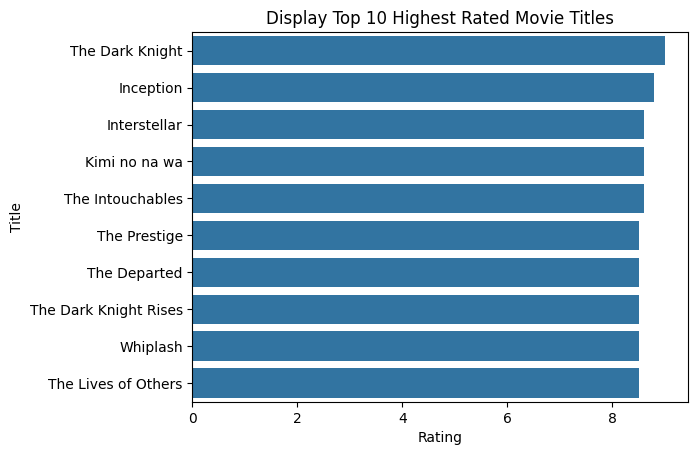

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('IMDB-Movie-Data.csv')
print(data.head(10))
print(data.tail(10))
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])
print(data.info())
# Check Null Values In The Dataset
data.isnull().sum()
# Check Null Values In The Dataset
percentage_null = (data.isnull().sum() / len(data)) * 100
print(percentage_null)
# plot the position of the missing values
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()
# Drop All The Missing Values
data = data.dropna(axis=0)
# or data.dropna(axis=0 , inplace = True )
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['#ff6666', '#66ff66'])
sns.heatmap(data.isnull(), cmap=cmap, cbar=False)
plt.show()
# Check For Duplicate Data
dup_data=data.duplicated().any()
print("Are there any duplicated values in data?",dup_data)
# Get Overall Statistics About The DataFrame
print(data.describe())
print(data.columns)
# Q1. Display Title of The Movie Having Runtime >= 180 Minutes ?
print(data[data['Runtime (Minutes)']>=180][['Title','Runtime (Minutes)']].set_index('Title'))
# find Which Year There Was The Highest Votin
df_Highest_Votin = data.groupby('Year')['Votes'].sum().sort_values(ascending=False).reset_index()
print(df_Highest_Votin)
# In Which Year There Was The Highest Voting?
sns.barplot(x='Year',y='Votes',data=df_Highest_Votin)
plt.title("Votes By Year")
plt.show()
# Find In Which Year There Was The Highest Revenue?
df_Highest_Revenue = data.groupby('Year')['Revenue (Millions)'].sum().sort_values(ascending=False).reset_index()
print(df_Highest_Revenue)
# In Which Year There Was The Highest Revenue?
sns.barplot(x='Year',y='Revenue (Millions)',data=df_Highest_Revenue)
plt.title("Revenue By Year")
plt.show()
# Find The Average Rating For Each Director
df_director = data.groupby('Director')['Rating'].mean().sort_values(ascending=False).reset_index()
print(df_director)
# what is Top 10 Lengthy Movies Title
le =data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')
print(le)
sns.barplot(x=le['Runtime (Minutes)'],y=le.index)
plt.title('Top 5 Lengtly Movies')
plt.show()
# Display Top 10 Highest Rated Movie Titles And its Directors
top_10=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')
print(top_10)
sns.barplot(x=top_10['Rating'],y=top_10.index)
plt.title("Display Top 10 Highest Rated Movie Titles");